In [166]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings #to remove the warnings
import random
import sys
sys.path.append('../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from genSynData import generateSyntheticDataset
from subsampleData import subsample
from models import trainModels
warnings.filterwarnings('ignore')
import random
random.seed(42)
np.random.seed(42)


# WBC Imbalance Testing


### Loading in Data


In [167]:
raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)


for i in df:
    df[i] = df[i].astype(np.int)


### Collecting Augmented Results

In [168]:
augKnnWBC = []
augNbWBC = []
augLrWBC = []
augSvmWBC = []
augDtWBC = []
augVcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWBC.append(scores[0])
    augNbWBC.append(scores[1])
    augLrWBC.append(scores[2])
    augSvmWBC.append(scores[3])
    augDtWBC.append(scores[4])
    augVcWBC.append(scores[5])
    print('Iteration: {}'.format(i))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


### Collecting Raw Results

In [169]:
knnWBC = []
nbWBC = []
lrWBC = []
svmWBC = []
dtWBC = []
vcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWBC.append(scores[0])
    nbWBC.append(scores[1])
    lrWBC.append(scores[2])
    svmWBC.append(scores[3])
    dtWBC.append(scores[4])
    vcWBC.append(scores[5])
    print('Iteration: {}'.format(i))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


### Collecting Oversampled Results


In [170]:
overKnnWBC = []
overNbWBC = []
overLrWBC = []
overSvmWBC = []
overDtWBC = []
overVcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    overKnnWBC.append(scores[0])
    overNbWBC.append(scores[1])
    overLrWBC.append(scores[2])
    overSvmWBC.append(scores[3])
    overDtWBC.append(scores[4])
    overVcWBC.append(scores[5])
    print('Iteration: {}'.format(i))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


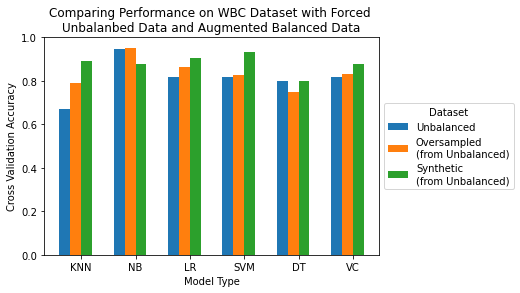

In [171]:
import matplotlib.pyplot as plt 
  
X_Vals = ['KNN','NB','LR','SVM', 'DT', 'VC']

aug = [np.mean(augKnnWBC), np.mean(augNbWBC), np.mean(augLrWBC),
        np.mean(augSvmWBC), np.mean(augDtWBC), np.mean(augVcWBC)]
reg = [np.mean(knnWBC), np.mean(nbWBC), np.mean(lrWBC),
        np.mean(svmWBC), np.mean(dtWBC), np.mean(vcWBC)]
over = [np.mean(overKnnWBC), np.mean(overNbWBC), np.mean(overLrWBC),
        np.mean(overSvmWBC), np.mean(overDtWBC), np.mean(overVcWBC)]


  
X_axis = np.arange(len(X_Vals))


 
plt.bar(X_axis - 0.3, reg, 0.2, label = 'Unbalanced')
plt.bar(X_axis - 0.1, over, 0.2, label = 'Oversampled\n(from Unbalanced)')
plt.bar(X_axis + 0.1, aug, 0.2, label = 'Synthetic\n(from Unbalanced)')
plt.xticks(X_axis, X_Vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.0,1)
plt.title("Comparing Performance on WBC Dataset with Forced \nUnbalanbed Data and Augmented Balanced Data")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [172]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})



In [173]:
augKnnWDBC = []
augNbWDBC = []
augLrWDBC = []
augSvmWDBC = []
augDtWDBC = []
augVcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWDBC.append(scores[0])
    augNbWDBC.append(scores[1])
    augLrWDBC.append(scores[2])
    augSvmWDBC.append(scores[3])
    augDtWDBC.append(scores[4])
    augVcWDBC.append(scores[5])
    print('Iteration: {}'.format(i))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


In [174]:
knnWDBC = []
nbWDBC = []
lrWDBC = []
svmWDBC = []
dtWDBC = []
vcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWDBC.append(scores[0])
    nbWDBC.append(scores[1])
    lrWDBC.append(scores[2])
    svmWDBC.append(scores[3])
    dtWDBC.append(scores[4])
    vcWDBC.append(scores[5])
    print('Iteration: {}'.format(i))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


In [175]:
overKnnWDBC = []
overNbWDBC = []
overLrWDBC = []
overSvmWDBC = []
overDtWDBC = []
overVcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    overKnnWDBC.append(scores[0])
    overNbWDBC.append(scores[1])
    overLrWDBC.append(scores[2])
    overSvmWDBC.append(scores[3])
    overDtWDBC.append(scores[4])
    overVcWDBC.append(scores[5])
    print('Iteration: {}'.format(i))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


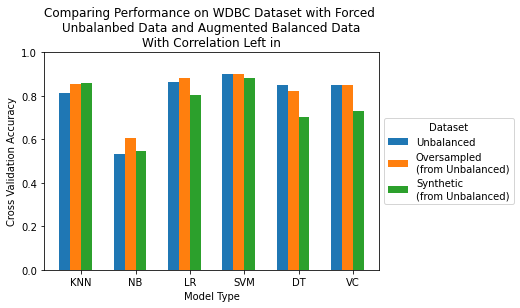

In [176]:
import matplotlib.pyplot as plt 
  
X_Vals = ['KNN','NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augKnnWDBC), np.mean(augNbWDBC), np.mean(augLrWDBC),
        np.mean(augSvmWDBC), np.mean(augDtWDBC), np.mean(augVcWDBC)]
reg = [np.mean(knnWDBC), np.mean(nbWDBC), np.mean(lrWDBC),
        np.mean(svmWDBC), np.mean(dtWDBC), np.mean(vcWDBC)]
over = [np.mean(overKnnWDBC), np.mean(overNbWDBC), np.mean(overLrWDBC),
        np.mean(overSvmWDBC), np.mean(overDtWDBC), np.mean(overVcWDBC)]
  
X_axis = np.arange(len(X_Vals))
  
plt.bar(X_axis - 0.3, reg, 0.2, label = 'Unbalanced')
plt.bar(X_axis - 0.1, over, 0.2, label = 'Oversampled\n(from Unbalanced)')
plt.bar(X_axis + 0.1, aug, 0.2, label = 'Synthetic\n(from Unbalanced)')
  
plt.xticks(X_axis, X_Vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.0,1)
plt.title("Comparing Performance on WDBC Dataset with Forced \nUnbalanbed Data and Augmented Balanced Data\nWith Correlation Left in")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [177]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
#Columns Identified by Correlation Matrix
#When Columns were correlated, that which was most correlated with the target variable (Diagnosis)
#Was Kept
colsInUse = ['ID', 'Diagnosis', 'texture', 'smoothness', 'symmetry', 'fractal_dimension', 
                'radius_SE', 'texture_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
                'texture_MAX', 'perimeter_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']

df = df[colsInUse]



In [178]:
augKnnWDBC_Stripped = []
augNbWDBC_Stripped = []
augLrWDBC_Stripped = []
augSvmWDBC_Stripped = []
augDtWDBC_Stripped = []
augVcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWDBC_Stripped.append(scores[0])
    augNbWDBC_Stripped.append(scores[1])
    augLrWDBC_Stripped.append(scores[2])
    augSvmWDBC_Stripped.append(scores[3])
    augDtWDBC_Stripped.append(scores[4])
    augVcWDBC_Stripped.append(scores[5])
    print('Iteration: {}'.format(i))



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


In [179]:
knnWDBC_Stripped = []
nbWDBC_Stripped = []
lrWDBC_Stripped = []
svmWDBC_Stripped = []
dtWDBC_Stripped = []
vcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWDBC_Stripped.append(scores[0])
    nbWDBC_Stripped.append(scores[1])
    lrWDBC_Stripped.append(scores[2])
    svmWDBC_Stripped.append(scores[3])
    dtWDBC_Stripped.append(scores[4])
    vcWDBC_Stripped.append(scores[5])
    print('Iteration: {}'.format(i))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


In [180]:
overKnnWDBC_Stripped = []
overNbWDBC_Stripped = []
overLrWDBC_Stripped = []
overSvmWDBC_Stripped = []
overDtWDBC_Stripped = []
overVcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    overKnnWDBC_Stripped.append(scores[0])
    overNbWDBC_Stripped.append(scores[1])
    overLrWDBC_Stripped.append(scores[2])
    overSvmWDBC_Stripped.append(scores[3])
    overDtWDBC_Stripped.append(scores[4])
    overVcWDBC_Stripped.append(scores[5])
    print('Iteration: {}'.format(i))



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


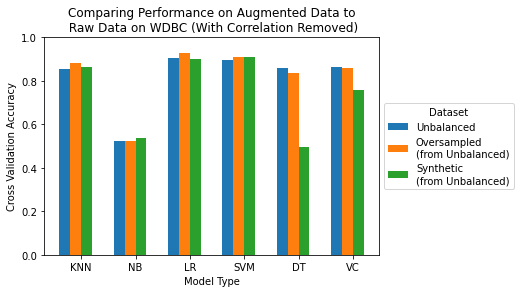

In [181]:
X = ['KNN','NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augKnnWDBC_Stripped), np.mean(augNbWDBC_Stripped), np.mean(augLrWDBC_Stripped),
        np.mean(augSvmWDBC_Stripped), np.mean(augDtWDBC_Stripped), np.mean(augVcWDBC_Stripped)]
reg = [np.mean(knnWDBC_Stripped), np.mean(nbWDBC_Stripped), np.mean(lrWDBC_Stripped),
        np.mean(svmWDBC_Stripped), np.mean(dtWDBC_Stripped), np.mean(vcWDBC_Stripped)]
over = [np.mean(overKnnWDBC_Stripped), np.mean(overNbWDBC_Stripped), np.mean(overLrWDBC_Stripped),
        np.mean(overSvmWDBC_Stripped), np.mean(overDtWDBC_Stripped), np.mean(overVcWDBC_Stripped)]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, reg, 0.2, label = 'Unbalanced')
plt.bar(X_axis - 0.1, over, 0.2, label = 'Oversampled\n(from Unbalanced)')
plt.bar(X_axis + 0.1, aug, 0.2, label = 'Synthetic\n(from Unbalanced)')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WDBC (With Correlation Removed)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

